<a href="https://colab.research.google.com/github/stear0727/-computer/blob/main/%E8%83%B8%E9%83%A8_X_%E5%85%89%E8%82%BA%E7%82%8E%E5%88%86%E9%A1%9E_93_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Chest-xray pneumonia Classification 93%
資料來源:https://www.kaggle.com/code/romanyn36/chest-xray-pneumonia-classification-93

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Chest-xray pneumonia Classification 93% 胸部 X 光肺炎分類 93%
# 此資料集分為 3 個資料夾（train、test、val），並包含每個影像類別（肺炎/正常）的子資料夾。有 5,863 張 X 光影像 (JPEG) 和 2 個類別（肺炎/正常）。

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [ ]:
import os  # 用於操作系統相關功能，例如文件和目錄操作
import cv2  # OpenCV 庫，用於圖像處理
import glob  # 用於查找符合特定模式的所有路徑名
import keras  # 深度學習框架，用於構建和訓練神經網絡
import random  # 用於生成隨機數
import numpy as np  # 數值計算庫，用於處理數組
import pandas as pd  # 數據處理和分析庫
import seaborn as sns  # 視覺化庫，用於繪圖
import tensorflow as tf  # 深度學習框架，用於構建和訓練神經網絡
from keras.models import Model  # 從 Keras 導入 Model 類，用於構建模型
import matplotlib.pyplot as plt  # 視覺化庫，用於繪圖
from sklearn.utils import resample  # 用於數據重採樣
from keras.models import load_model  # 用於加載已保存的 Keras 模型
from sklearn.metrics import confusion_matrix  # 用於計算混淆矩陣
from sklearn.metrics import classification_report  # 用於生成分類報告
from sklearn.model_selection import train_test_split  # 用於拆分數據集
from keras.callbacks import ModelCheckpoint, EarlyStopping  # 用於在訓練過程中進行模型檢查點保存和早停
from keras.layers import BatchNormalization, MaxPooling2D, Flatten  # 用於構建神經網絡層
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # 用於圖像數據增強
from sklearn.metrics import f1_score, precision_score, recall_score  # 用於計算 F1 分數、精確率和召回率
from keras.layers import Conv2D, Dense, Dropout, GlobalAveragePooling2D, MaxPool2D  # 用於構建神經網絡層
from datasets import load_dataset  # 用於加載 Hugging Face 的數據集
import warnings  # 用於處理警告
warnings.filterwarnings('ignore')  # 忽略警告
import tensorflow as tf  # 深度學習框架，用於構建和訓練神經網絡（重複導入）
import logging  # 用於設置日誌級別
# Set TensorFlow log level to only display errors
tf.get_logger().setLevel(logging.ERROR)  # 設置 TensorFlow 日誌級別為僅顯示錯誤


In [ ]:
data_dir = '/content/drive/MyDrive/chest_xray'  # 定義數據目錄的路徑
paths = glob.glob(data_dir + '/*/*/*.jpeg')  # 使用 glob 模塊查找數據目錄中的所有 .jpeg 圖像文件
print(f'found {len(paths)} images in the dataset')  # 打印找到的圖像文件數量
paths[:5]  # 顯示前 5 個圖像文件的路徑

found 5856 images in the dataset


['/content/drive/MyDrive/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg',
 '/content/drive/MyDrive/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg',
 '/content/drive/MyDrive/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg',
 '/content/drive/MyDrive/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg',
 '/content/drive/MyDrive/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg']

In [ ]:
df = pd.DataFrame(paths, columns=['path'])  # 創建一個包含圖像文件路徑的 DataFrame，並命名列為 'path'
df['label'] = df['path'].apply(lambda x: x.split('/')[6].strip())  # 從每個文件路徑中提取標籤，並創建一個新的 'label' 列
df.head()  # 顯示 DataFrame 的前五行


# DataFrame 是 Pandas 庫中的一種主要數據結構，它是一個類似電子表格的二維數據結構，包含行和列。DataFrame 可以看作是一組有序的數組，每個數組都具有標籤（列名），這使得它能夠更靈活地操作和分析數據。
# 以下是一些關於 DataFrame 的重要特點：
# 行和列：DataFrame 由行和列組成，每一列可以是不同的數據類型（例如，整數、浮點數、字符串）。
# 標籤：行和列都有標籤，這使得數據的查詢和操作更加直觀。
# 缺失值：DataFrame 可以處理缺失值，這在現實數據集中是很常見的。
# 操作：Pandas 提供了豐富的函數來操作 DataFrame，例如過濾、分組、聚合、合併、透視表等。

,path,label
0,/content/drive/MyDrive/chest_xray/val/PNEUMONI...,PNEUMONIA
1,/content/drive/MyDrive/chest_xray/val/PNEUMONI...,PNEUMONIA
2,/content/drive/MyDrive/chest_xray/val/PNEUMONI...,PNEUMONIA
3,/content/drive/MyDrive/chest_xray/val/PNEUMONI...,PNEUMONIA
4,/content/drive/MyDrive/chest_xray/val/PNEUMONI...,PNEUMONIA


In [ ]:
counts = df['label'].value_counts()  # 計算 'label' 列中每個唯一值的出現次數，並將結果存儲在 'counts' 變量中
counts  # 顯示 'counts' 變量的內容


label
PNEUMONIA    4273
NORMAL       1583
Name: count, dtype: int64

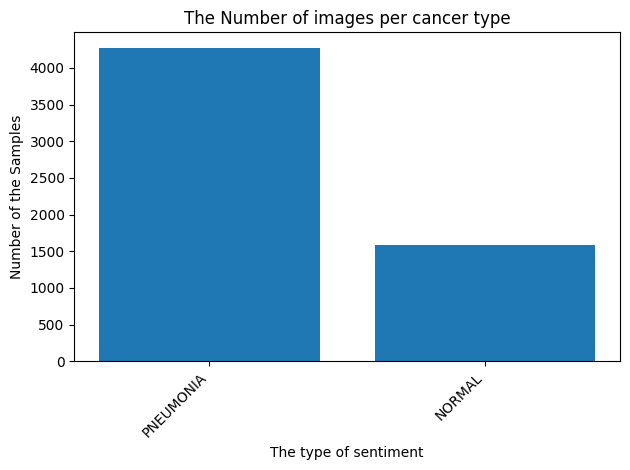

In [ ]:
plt.bar(['PNEUMONIA', 'NORMAL'], counts, width=0.8)  # 繪製一個柱狀圖，x 軸標籤為 'PNEUMONIA' 和 'NORMAL'，y 軸為 'counts' 中的值
plt.xlabel('The type of sentiment')  # 設置 x 軸標籤為 'The type of sentiment'
plt.ylabel('Number of the Samples')  # 設置 y 軸標籤為 'Number of the Samples'
plt.title("The Number of images per cancer type")  # 設置圖表標題為 'The Number of images per cancer type'
plt.xticks(rotation=45, ha='right')  # 設置 x 軸標籤的旋轉角度為 45 度，並將標籤的對齊方式設置為右對齊
plt.tight_layout()  # 自動調整子圖參數，使圖表佔滿整個圖像區域
plt.show()  # 顯示圖表


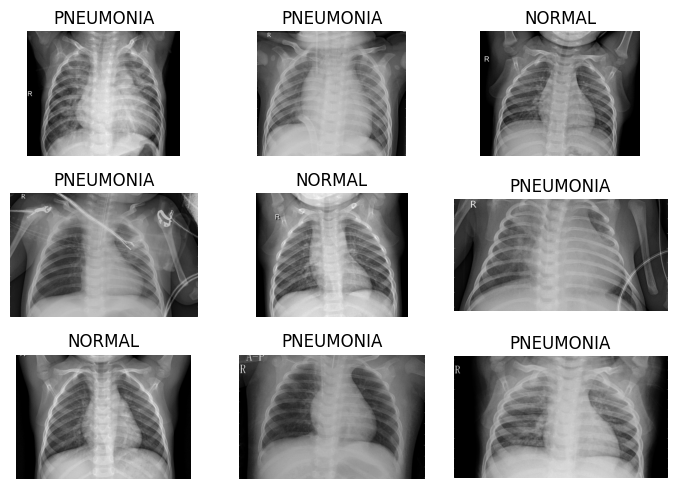

In [ ]:
num_images = 9  # 設置要隨機選取的圖像數量為 9

# 隨機從 DataFrame 中選取 num_images 張圖像，並重置索引
sampled_df = df.sample(n=num_images).reset_index(drop=True)

plt.figure(figsize=(7, 5))  # 設置圖表大小為 7x5 英寸
for i in range(num_images):
    plt.subplot(3, 3, i + 1)  # 創建一個 3x3 的子圖網格，並選擇第 i+1 個子圖

    # 讀取圖像
    img_path = sampled_df.iloc[i]['path']  # 獲取圖像的文件路徑
    img = plt.imread(img_path)  # 使用 plt.imread 讀取圖像文件

    plt.imshow(img, cmap='gray')  # 以灰度圖像顯示
    plt.title(sampled_df.iloc[i]['label'])  # 設置子圖標題為圖像的標籤
    plt.axis('off')  # 隱藏坐標軸

plt.tight_layout()  # 自動調整子圖參數，使圖表佔滿整個圖像區域
plt.show()  # 顯示圖表


In [ ]:
df_majority = df[df.label == 'PNEUMONIA']  # 選取標籤為 'PNEUMONIA' 的資料行，並將其存放在 df_majority 中
df_minority = df[df.label == 'NORMAL']    # 選取標籤為 'NORMAL' 的資料行，並將其存放在 df_minority 中


In [ ]:
counts=df['label'].value_counts()
counts

label
PNEUMONIA    4273
NORMAL       1583
Name: count, dtype: int64

In [ ]:
# Downsample majority class
df_majority_downsampled = resample(
    df_majority,  # 多數類別的 DataFrame
    replace=False,  # 不進行有放回抽樣
    n_samples=len(df_minority),  # 目標樣本數量與少數類別的數量相同
    random_state=42  # 設置隨機狀態以保證結果可重現
)

# Combine minority class with downsampled majority class
df = pd.concat([df_minority, df_majority_downsampled])  # 合併少數類別和下采樣後的多數類別的 DataFrame


In [ ]:
counts=df['label'].value_counts()
counts

label
NORMAL       1583
PNEUMONIA    1583
Name: count, dtype: int64

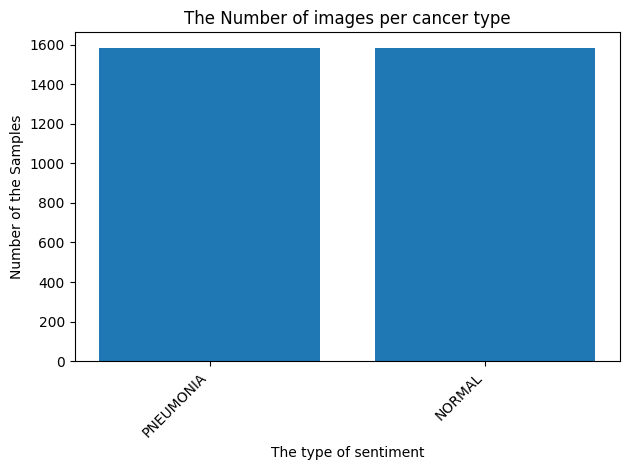

In [ ]:
plt.bar(['PNEUMONIA', 'NORMAL'], counts, width=0.8)  # 建立一個條形圖，顯示 'PNEUMONIA' 和 'NORMAL' 類別的樣本數量
plt.xlabel('The type of sentiment')  # 設置 X 軸標籤為 "The type of sentiment"
plt.ylabel('Number of the Samples')  # 設置 Y 軸標籤為 "Number of the Samples"
plt.title("The Number of images per cancer type")  # 設置圖表標題為 "The Number of images per cancer type"
plt.xticks(rotation=45, ha='right')  # 將 X 軸標籤旋轉 45 度，並將標籤對齊方式設為右對齊
plt.tight_layout()  # 自動調整子圖參數，使圖表佈局緊湊
plt.show()  # 顯示圖表


In [ ]:
df

,path,label
8,/content/drive/MyDrive/chest_xray/val/NORMAL/N...,NORMAL
9,/content/drive/MyDrive/chest_xray/val/NORMAL/N...,NORMAL
10,/content/drive/MyDrive/chest_xray/val/NORMAL/N...,NORMAL
11,/content/drive/MyDrive/chest_xray/val/NORMAL/N...,NORMAL
12,/content/drive/MyDrive/chest_xray/val/NORMAL/N...,NORMAL
...,...,...
4473,/content/drive/MyDrive/chest_xray/train/PNEUMO...,PNEUMONIA
3774,/content/drive/MyDrive/chest_xray/train/PNEUMO...,PNEUMONIA
3781,/content/drive/MyDrive/chest_xray/train/PNEUMO...,PNEUMONIA
3370,/content/drive/MyDrive/chest_xray/train/PNEUMO...,PNEUMONIA


In [ ]:
df['label'] = df['label'].apply(lambda x: '1' if x == 'PNEUMONIA' else '0')  # 將 'label' 列中的值應用 lambda 函數，如果值是 'PNEUMONIA' 則設為 '1'，否則設為 '0'
df.head()  # 顯示 DataFrame 的前五行資料


,path,label
8,/content/drive/MyDrive/chest_xray/val/NORMAL/N...,0
9,/content/drive/MyDrive/chest_xray/val/NORMAL/N...,0
10,/content/drive/MyDrive/chest_xray/val/NORMAL/N...,0
11,/content/drive/MyDrive/chest_xray/val/NORMAL/N...,0
12,/content/drive/MyDrive/chest_xray/val/NORMAL/N...,0


In [ ]:
df

,path,label
8,/content/drive/MyDrive/chest_xray/val/NORMAL/N...,0
9,/content/drive/MyDrive/chest_xray/val/NORMAL/N...,0
10,/content/drive/MyDrive/chest_xray/val/NORMAL/N...,0
11,/content/drive/MyDrive/chest_xray/val/NORMAL/N...,0
12,/content/drive/MyDrive/chest_xray/val/NORMAL/N...,0
...,...,...
4473,/content/drive/MyDrive/chest_xray/train/PNEUMO...,1
3774,/content/drive/MyDrive/chest_xray/train/PNEUMO...,1
3781,/content/drive/MyDrive/chest_xray/train/PNEUMO...,1
3370,/content/drive/MyDrive/chest_xray/train/PNEUMO...,1


In [ ]:
df['label'].value_counts()

label
0    1583
1    1583
Name: count, dtype: int64

In [ ]:
df = df.sample(frac=1.0, random_state=42)  # 將 DataFrame 的所有行打亂順序，frac=1.0 表示返回所有行，random_state=42 保證隨機狀態可重現
df.head(5)  # 顯示 DataFrame 的前五行資料


,path,label
4837,/content/drive/MyDrive/chest_xray/train/NORMAL...,0
5603,/content/drive/MyDrive/chest_xray/train/NORMAL...,0
568,/content/drive/MyDrive/chest_xray/test/NORMAL/...,0
1101,/content/drive/MyDrive/chest_xray/train/PNEUMO...,1
117,/content/drive/MyDrive/chest_xray/test/PNEUMON...,1


In [ ]:
# Splitting data
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)  # 將 DataFrame 分成訓練集 (80%) 和臨時集 (20%)，random_state=42 保證隨機狀態可重現
test_df, valid_df = train_test_split(temp_df, test_size=0.5, random_state=42)  # 將臨時集再分成測試集 (10%) 和驗證集 (10%)，random_state=42 保證隨機狀態可重現
print("Training set shapes:", train_df.shape)  # 列印訓練集的形狀 (行數和列數)
print("Validation set shapes:", valid_df.shape)  # 列印驗證集的形狀 (行數和列數)
print("Testing set shapes:", test_df.shape)  # 列印測試集的形狀 (行數和列數)


Training set shapes: (2532, 2)
Validation set shapes: (317, 2)
Testing set shapes: (317, 2)


In [ ]:
train_df['label'].value_counts()

label
1    1277
0    1255
Name: count, dtype: int64

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # 將圖像像素值縮放到 0 到 1 之間的範圍
#     shear_range=0.2,  # 隨機應用剪切強度的範圍
#     rotation_range=.1,  # 隨機旋轉圖像的角度範圍
#     zoom_range=0.2,  # 隨機縮放圖像的範圍
#     horizontal_flip=True ,  # 隨機水平翻轉圖像
)

test_datagen = ImageDataGenerator(rescale=1./255)  # 將測試集圖像的像素值縮放到 0 到 1 之間的範圍


In [ ]:
# Training data generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,  # 使用訓練集的 DataFrame
    x_col='path',  # 設定圖像路徑的列名
    y_col='label',  # 設定標籤的列名
    target_size=(150, 150),  # 調整圖像大小為 150x150 像素
    batch_size=32,  # 每個批次的圖像數量為 32
    class_mode='binary',  # 標籤為二元分類
    color_mode='rgb',  # 圖像顏色模式為 RGB
    shuffle=True  # 隨機打亂數據
)

# Validation data generator
valid_generator = test_datagen.flow_from_dataframe(
    dataframe=valid_df,  # 使用驗證集的 DataFrame
    x_col='path',  # 設定圖像路徑的列名
    y_col='label',  # 設定標籤的列名
    target_size=(150, 150),  # 調整圖像大小為 150x150 像素
    batch_size=32,  # 每個批次的圖像數量為 32
    color_mode='rgb',  # 圖像顏色模式為 RGB
    class_mode='binary',  # 標籤為二元分類
    shuffle=False  # 不打亂數據
)

# Testing data generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,  # 使用測試集的 DataFrame
    x_col='path',  # 設定圖像路徑的列名
    y_col='label',  # 設定標籤的列名
    target_size=(150, 150),  # 調整圖像大小為 150x150 像素
    color_mode='rgb',  # 圖像顏色模式為 RGB
    batch_size=64,  # 每個批次的圖像數量為 64
    class_mode='binary',  # 標籤為二元分類
    shuffle=False  # 不打亂數據
)

# 2532：這是訓練集中找到的圖像文件數量。
# 2 classes：這是圖像屬於的類別數量，即二元分類（例如，'PNEUMONIA' 和 'NORMAL'）。
# 317：這是驗證集中找到的圖像文件數量。
# 2 classes：這是圖像屬於的類別數量，即二元分類。
# 317：這是測試集中找到的圖像文件數量。
# 2 classes：這是圖像屬於的類別數量，即二元分類。

Found 2532 validated image filenames belonging to 2 classes.
Found 317 validated image filenames belonging to 2 classes.
Found 317 validated image filenames belonging to 2 classes.


In [ ]:
classes = ['NORMAL', 'PNEUMONIA']  # 定義類別名稱的列表，包含 'NORMAL' 和 'PNEUMONIA'
classes

['NORMAL', 'PNEUMONIA']

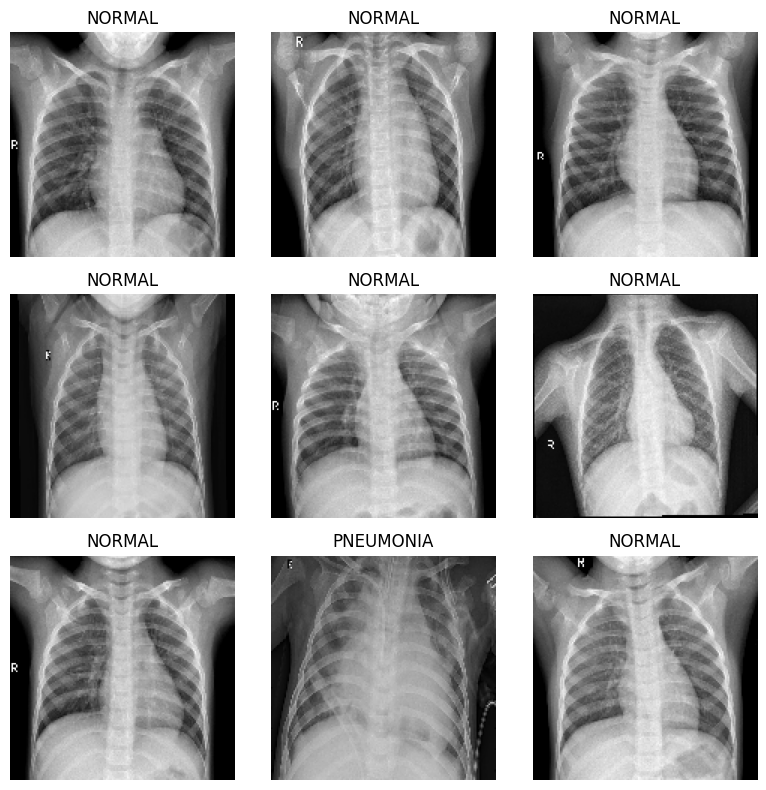

In [ ]:
batch_size = 9  # 設定批次大小為 9
# Generate a batch of images and labels
images, labels = next(train_generator)  # 從訓練數據生成器中生成一批圖像和標籤
# Plot the images with their labels
plt.figure(figsize=(8, 8))  # 設置圖形大小為 8x8 英寸
for i in range(min(len(images), 9)):  # 遍歷圖像數量，最多顯示 9 張圖像
    plt.subplot(3, 3, i + 1)  # 在 3x3 網格的第 i+1 個子圖中繪製圖像
    plt.imshow(images[i], cmap='gray')  # 以灰度圖顯示第 i 張圖像
    plt.title(f"{classes[int(labels[i])]}")  # 設置子圖的標題為對應的類別名稱
    plt.axis('off')  # 隱藏子圖的軸

plt.tight_layout()  # 自動調整子圖參數，使圖表佈局緊湊
plt.show()  # 顯示圖表


In [ ]:
train_generator.image_shape  # 獲取訓練數據生成器中圖像的形狀（大小、通道數等）


(150, 150, 3)

In [ ]:
from keras.applications import MobileNetV2  # 從 Keras 應用中導入 MobileNetV2
mobileNetV2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))  # 加載預訓練的 MobileNetV2 模型，不包括頂層，並設置輸入形狀為 (150, 150, 3)

# Freeze pretrained layers
for layer in mobileNetV2.layers:  # 遍歷 MobileNetV2 模型中的所有層
    layer.trainable = False  # 將每一層的 trainable 屬性設置為 False，以凍結預訓練層的權重


9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
mobileNet = keras.models.Sequential([  # 使用順序模型來建立網絡
    mobileNetV2,  # 添加預訓練的 MobileNetV2 模型作為基礎
    GlobalAveragePooling2D(),  # 添加全局平均池化層，將特徵圖轉換為一維向量
    Dense(128, activation='relu'),  # 添加全連接層，具有 128 個單元和 ReLU 激活函數
    Dropout(0.5),  # 添加 Dropout 層，隨機丟棄 50% 的神經元來防止過擬合
    Dense(1, activation='sigmoid')  # 添加輸出層，具有 1 個單元和 Sigmoid 激活函數，適用於二元分類
])

mobileNet.add(Dense(1, activation='sigmoid'))  # 再次添加一個輸出層，具有 1 個單元和 Sigmoid 激活函數

mobileNet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # 編譯模型，設置優化器為 Adam，損失函數為二元交叉熵，評估指標為準確率



In [ ]:
mobileNet.summary()  # 輸出模型的結構摘要，包括每層的名稱、輸出形狀和參數數量

# 模型是順序模型（Sequential）。
# Layer type: Functional（函數式層）
# Output Shape: (None, 5, 5, 1280) 表示輸出形狀為 5x5x1280 的張量，其中 None 代表批次大小
# Param : 2257984 表示此層有 2257984 個參數（權重）
# Layer type: GlobalAveragePooling2D
# Output Shape: (None, 1280) 表示輸出形狀為 1280 的一維向量
# Param : 0 表示此層沒有可訓練的參數
# Layer type: Dense（全連接層）
# Output Shape: (None, 128) 表示輸出形狀為 128 的一維向量
# Param : 163968 表示此層有 163968 個參數
# Layer type: Dropout
# Output Shape: (None, 128) 表示輸出形狀保持不變
# Param : 0 表示此層沒有可訓練的參數
# Layer type: Dense（全連接層）
# Output Shape: (None, 1) 表示輸出形狀為 1 的一維向量
# Param : 129 表示此層有 129 個參數
# Layer type: Dense（全連接層）
# Output Shape: (None, 1) 表示輸出形狀為 1 的一維向量
# Param : 2 表示此層有 2 個參數
# Total params: 2422083 表示模型總共有 2422083 個參數（大約 9.24 MB）
# Trainable params: 164099 表示可訓練的參數數量為 164099（大約 641.01 KB）
# Non-trainable params: 2257984 表示不可訓練的參數數量為 2257984（大約 8.61 MB）

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
 dense_2 (Dense)             (None, 1)                 2

In [ ]:
Model: "sequential_11"  # 模型名稱為 sequential_11


In [ ]:
weight_path = "cnn_weights.best.weights.h5"  # 設置模型權重的保存路徑和文件名

checkpoint = ModelCheckpoint(weight_path,  # 設置模型檢查點，根據驗證集準確率保存最佳模型
                             monitor='val_accuracy',  # 監控驗證集準確率
                             verbose=1,  # 詳細模式，顯示保存信息
                             save_best_only=True,  # 僅保存在驗證集上性能最好的模型
                             mode='max',  # 目標是最大化驗證集準確率
                             save_weights_only=True)  # 僅保存模型權重，而非整個模型

early = EarlyStopping(monitor="val_accuracy",  # 監控驗證集準確率
                      mode="max",  # 目標是最大化驗證集準確率
                      patience=4)  # 如果性能不再改善，則在停止訓練之前等待的時期數

callbacks_list = [checkpoint, early]  # 將回調函數列表組合為一個列表


In [ ]:
mobileNet_history = mobileNet.fit(train_generator,  # 使用訓練數據生成器進行訓練
                                  epochs=5,  # 設置訓練的時期數為 5
                                  validation_data=valid_generator,  # 使用驗證數據生成器進行驗證
                                  callbacks=callbacks_list)  # 指定回調函數列表


Epoch 1/5
80/80 [==============================] - ETA: 0s - loss: 0.5933 - accuracy: 0.8250
Epoch 1: val_accuracy improved from -inf to 0.92429, saving model to cnn_weights.best.weights.h5
80/80 [==============================] - 909s 11s/step - loss: 0.5933 - accuracy: 0.8250 - val_loss: 0.5650 - val_accuracy: 0.9243
Epoch 2/5
80/80 [==============================] - ETA: 0s - loss: 0.5582 - accuracy: 0.9171
Epoch 2: val_accuracy improved from 0.92429 to 0.92744, saving model to cnn_weights.best.weights.h5
80/80 [==============================] - 86s 1s/step - loss: 0.5582 - accuracy: 0.9171 - val_loss: 0.5439 - val_accuracy: 0.9274
Epoch 3/5
80/80 [==============================] - ETA: 0s - loss: 0.5419 - accuracy: 0.9246
Epoch 3: val_accuracy improved from 0.92744 to 0.93691, saving model to cnn_weights.best.weights.h5
80/80 [==============================] - 90s 1s/step - loss: 0.5419 - accuracy: 0.9246 - val_loss: 0.5274 - val_accuracy: 0.9369
Epoch 4/5
80/80 [==================

In [ ]:
# 加載最佳權重
mobileNet.load_weights(weight_path)


In [ ]:
# 在測試數據上評估模型性能
evaluation_result = mobileNet.evaluate(test_generator)

# 輸出評估結果
print("Test Loss:", evaluation_result[0])  # 打印測試損失
print("Test Accuracy:", evaluation_result[1])  # 打印測試準確率


5/5 [==============================] - 85s 21s/step - loss: 0.5149 - accuracy: 0.9306
Test Loss: 0.5149405002593994
Test Accuracy: 0.9305993914604187


In [ ]:
y_pred = mobileNet.predict(test_generator)  # 使用模型對測試數據生成器進行預測


5/5 [==============================] - 12s 2s/step


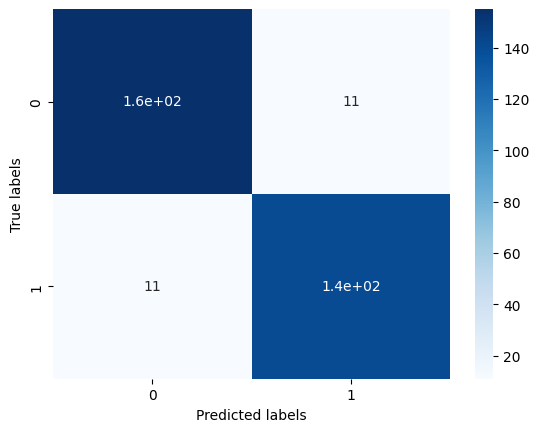

In [ ]:
y_pred_binary = np.squeeze(np.round(y_pred))  # 將連續的預測概率轉換為二元預測值（0或1）

# 創建混淆矩陣
confusion_Matrix = confusion_matrix(test_generator.classes, y_pred_binary)

# 顯示混淆矩陣熱圖
sns.heatmap(confusion_Matrix, annot=True, cmap='Blues')  # 使用熱圖顯示混淆矩陣，並添加標籤和顏色映射
plt.xlabel('Predicted labels')  # 設置x軸標籤為預測標籤
plt.ylabel('True labels')  # 設置y軸標籤為真實標籤
plt.show()  # 顯示圖表

# 圖表是混淆矩陣的熱圖，用於評估二元分類模型（例如您的深度學習模型）在測試數據集上的表現。以下是對圖表各部分的解釋：
# 熱圖（Heatmap）：
# 混淆矩陣中每個元素的值用顏色表示，顏色越深表示值越大。
# 在這裡，使用藍色調色板（cmap='Blues'），顏色越深表示相應的計數或比例越高。
# 類別標籤：
# Predicted labels（預測標籤）：x 軸顯示模型預測的類別。
# True labels（真實標籤）：y 軸顯示測試集中實際的類別。
# 熱圖中的數字：
# 每個格子中的數字表示模型對於特定組合（真實標籤和預測標籤）的預測次數或概率。
# 解釋混淆矩陣：
# 混淆矩陣顯示了模型在各個類別間的預測情況，具體解釋如下：
# 真實標籤 vs 預測標籤：
# 矩陣的行代表真實標籤（實際類別），列代表預測標籤（模型預測的類別）。
# 主對角線：
# 主對角線上的數字表示模型正確預測的樣本數量或比例。例如，(0, 0) 和 (1, 1) 的位置顯示了模型正確分類為負例和正例的樣本數量。
# 非對角線元素：
# 非對角線上的數字表示模型錯誤預測的情況。例如，(0, 1) 的位置顯示了模型將負例錯誤分類為正例的樣本數量。

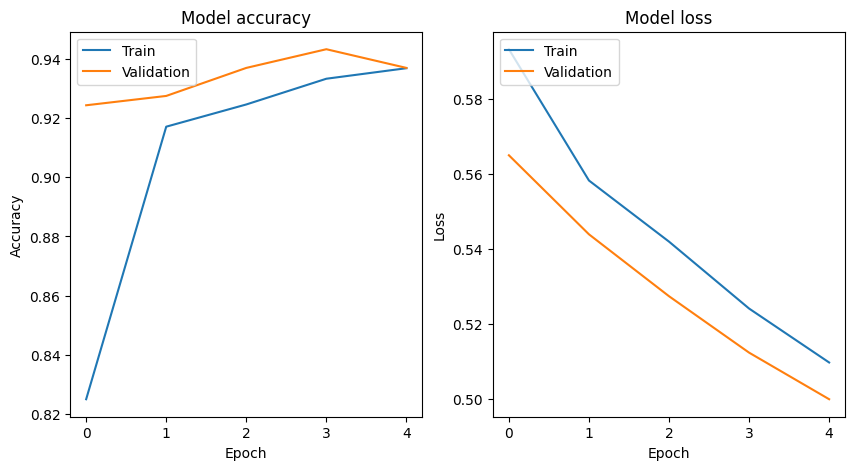

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 創建一個包含兩個子圖的圖表，大小為 10x5

# 繪製訓練和驗證準確率
ax1.plot(mobileNet_history.history['accuracy'])  # 繪製訓練準確率曲線
ax1.plot(mobileNet_history.history['val_accuracy'])  # 繪製驗證準確率曲線
ax1.set_title('Model accuracy')  # 設置子圖1的標題為模型準確率
ax1.set_ylabel('Accuracy')  # 設置y軸標籤為準確率
ax1.set_xlabel('Epoch')  # 設置x軸標籤為訓練時期
ax1.legend(['Train', 'Validation'], loc='upper left')  # 添加圖例，顯示“Train”和“Validation”的位置在左上角

# 繪製訓練和驗證損失
ax2.plot(mobileNet_history.history['loss'])  # 繪製訓練損失曲線
ax2.plot(mobileNet_history.history['val_loss'])  # 繪製驗證損失曲線
ax2.set_title('Model loss')  # 設置子圖2的標題為模型損失
ax2.set_ylabel('Loss')  # 設置y軸標籤為損失
ax2.set_xlabel('Epoch')  # 設置x軸標籤為訓練時期
ax2.legend(['Train', 'Validation'], loc='upper left')  # 添加圖例，顯示“Train”和“Validation”的位置在左上角

# 顯示圖表
plt.show()

# 圖表展示了訓練過程中模型的準確率和損失變化，以及在驗證集上的表現。以下是對圖表各部分的解釋：
# 左側子圖：模型準確率（Model accuracy）
# Y軸（Accuracy）：顯示模型的準確率，即模型正確預測的比例。
# X軸（Epoch）：顯示訓練時期的數量。
# 曲線解釋：
# Train（訓練集）：用線條表示模型在訓練集上的準確率隨時期變化的趨勢。
# Validation（驗證集）：用線條表示模型在驗證集上的準確率隨時期變化的趨勢。
# 圖例（Legend）：顯示了每條曲線所代表的含義，“Train”表示訓練集，“Validation”表示驗證集。
# 右側子圖：模型損失（Model loss）
# Y軸（Loss）：顯示模型的損失，即模型在訓練過程中的誤差大小。
# X軸（Epoch）：顯示訓練時期的數量。
# 曲線解釋：
# Train（訓練集）：用線條表示模型在訓練集上的損失隨時期變化的趨勢。
# Validation（驗證集）：用線條表示模型在驗證集上的損失隨時期變化的趨勢。
# 圖例（Legend）：顯示了每條曲線所代表的含義，“Train”表示訓練集，“Validation”表示驗證集。
# 圖表解釋：
# 訓練集 vs 驗證集比較：
# 在準確率圖表中，如果訓練集和驗證集的準確率曲線接近，表示模型在訓練過程中沒有出現過度擬合（overfitting）的現象。
# 在損失圖表中，如果訓練集和驗證集的損失曲線趨勢相似，表示模型在訓練過程中的學習效果良好。

In [ ]:
mobilenet_pred_binary = np.squeeze(np.round(y_pred))  # 將連續的預測概率轉換為二元預測值（0或1）
print(classification_report(test_generator.classes, mobilenet_pred_binary))  # 輸出分類報告，顯示精確率、召回率、F1分數等指標


# 模型在測試數據集上的詳細分類性能指標，以下是各部分的解釋：
# precision（精確率）：指模型預測為某一類（如 0 或 1）的樣本中，真正屬於該類的比例。
# recall（召回率）：指實際屬於某一類的樣本中，被模型成功預測為該類的比例。
# f1-score（F1分數）：綜合考慮精確率和召回率的調和平均值，是一個衡量模型在類別分類上綜合表現的指標。
# support：各類別在測試集中的樣本數量。
# accuracy（準確率）：模型正確預測的樣本比例。
# 解釋結果：
# 對於類別 0（NORMAL）：
# **精確率（precision）**為 0.93，表示模型預測為 NORMAL 的樣本中，實際上有 93% 為正確的預測。
# **召回率（recall）**為 0.93，表示所有正確屬於 NORMAL 的樣本中，模型能夠成功預測出 93%。
# **F1分數（F1-score）**為 0.93，顯示了精確率和召回率的調和平均值。
# 支持數（support）為 166，表示測試集中類別 0（NORMAL）的樣本數量。
# 對於類別 1（PNEUMONIA）：
# **精確率（precision）**為 0.93，表示模型預測為 PNEUMONIA 的樣本中，有 93% 是正確的預測。
# **召回率（recall）**為 0.93，表示所有實際屬於 PNEUMONIA 的樣本中，模型能夠成功預測出 93%。
# **F1分數（F1-score）**為 0.93，顯示了精確率和召回率的調和平均值。
# 支持數（support）為 151，表示測試集中類別 1（PNEUMONIA）的樣本數量。
# **準確率（accuracy）**為 0.93，表示模型在測試集上的整體預測準確率為 93%

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       166
           1       0.93      0.93      0.93       151

    accuracy                           0.93       317
   macro avg       0.93      0.93      0.93       317
weighted avg       0.93      0.93      0.93       317



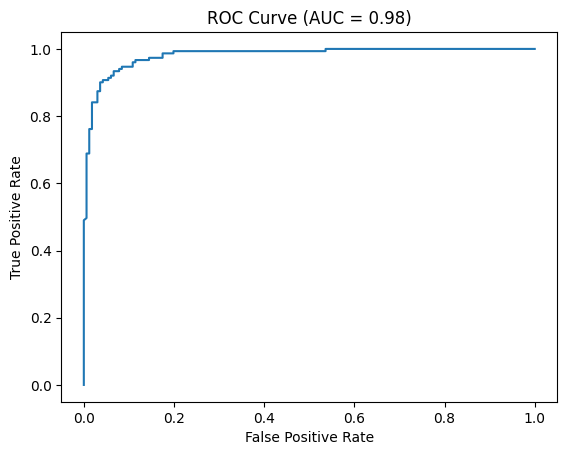

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# 計算不同分類閾值的假陽性率（FPR）、真陽性率（TPR）和閾值
fpr, tpr, thresholds = roc_curve(test_generator.classes, y_pred)

# 計算AUC（曲線下面積）分數
auc_score = roc_auc_score(test_generator.classes, y_pred)

# 繪製ROC曲線
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')  # X軸顯示假陽性率
plt.ylabel('True Positive Rate')   # Y軸顯示真陽性率
plt.title(f'ROC Curve (AUC = {auc_score:.2f})')  # 圖表標題顯示AUC分數
plt.show()

# ROC 曲線：ROC 曲線顯示了在不同的分類閾值下，模型的假陽性率（FPR）和真陽性率（TPR）之間的關係。
# 假陽性率（False Positive Rate，FPR）：在實際為負例的樣本中，被模型錯誤分類為正例的比例。
# 真陽性率（True Positive Rate，TPR）：在實際為正例的樣本中，模型成功預測為正例的比例，也稱為召回率（Recall）。
# AUC（Area Under the Curve）：ROC 曲線下的面積，用來評估模型的分類能力。AUC 越接近 1，表示模型的分類效果越好；越接近 0.5，則表示模型的分類效果越差。
# 圖表解釋：
# 此圖表顯示了模型在不同分類閾值下的表現。隨著閾值的變化，假陽性率（FPR）和真陽性率（TPR）會相應變化。
# AUC 分數（0.99）顯示模型在測試數據上的整體分類性能非常優秀，曲線越靠近左上角，表明模型在各種分類閾值下的表現都很好。

1/1 [==============================] - 0s 62ms/step


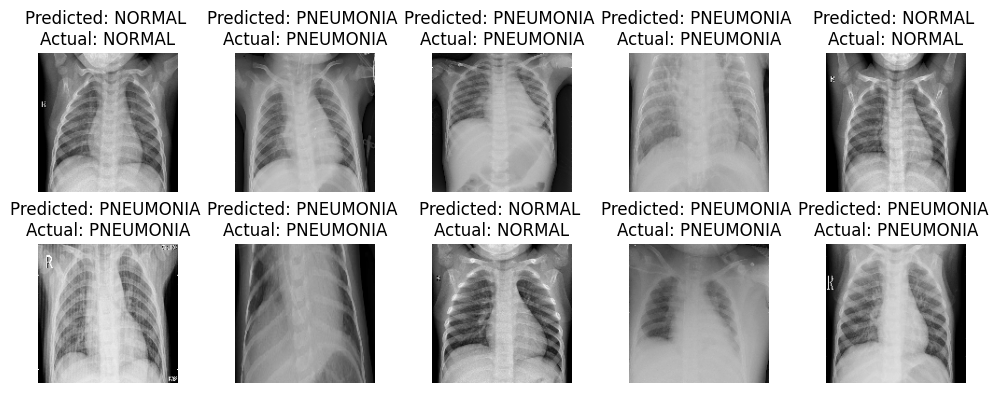

In [ ]:
x_test, y_test = next(test_generator)  # 從測試數據生成器中獲取一批次的測試圖像和標籤
fig, axs = plt.subplots(2, 5, figsize=(10, 4))  # 創建一個2行5列的子圖表格，每個子圖的大小為10x4英寸
axs = axs.flatten()  # 展平軸，以便於使用索引訪問每個子圖

for i in range(10):
    # 預測單個測試圖像的類別
    predicted = mobileNet.predict(np.array([x_test[i]]))  # 將索引 i 的測試圖像傳遞給模型進行預測
    predictedClass = int(predicted >= 0.5)  # 使用0.5閾值將連續的預測概率轉換為二元預測類別
    actual = int(y_test[i])  # 獲取真實的標籤值

    # 在每個子圖上顯示測試圖像，並標註預測類別和真實類別
    axs[i].imshow(x_test[i], cmap='gray')
    axs[i].set_title(f'Predicted: {classes[predictedClass]} \nActual: {classes[actual]}')  # 設置子圖標題，顯示預測和真實類別
    axs[i].axis('off')  # 關閉子圖的坐標軸顯示

plt.tight_layout()  # 自動調整子圖的佈局，以確保子圖之間的間距合適
plt.show()  # 顯示圖表

# 圖像顯示：
# 每個子圖顯示了一張測試圖像。
# 圖像使用灰度顯示（由 cmap='gray' 指定）。
# 標題顯示：
# 每個子圖的標題顯示了兩部分：
# 預測類別（Predicted）：模型根據測試圖像的內容所做出的預測。在這裡，使用了二元分類模型，因此顯示為模型預測的類別（例如 'NORMAL' 或 'PNEUMONIA'）。
# 真實類別（Actual）：每張測試圖像的真實標籤。這是由測試集中的標籤資料提供的（例如 'NORMAL' 或 'PNEUMONIA'）。
# 圖像軸顯示：
# 每個子圖的坐標軸已經被關閉，因為這些圖像是用來展示而非進行精確的像素位置顯示。
